In [1]:
from ultralytics import YOLO

In [2]:
# load YOLO-V8 model 
yolo_8 = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:11<00:00, 555kB/s]


In [4]:
# Perform object detection on an image
results = yolo_8("https://ultralytics.com/images/bus.jpg")



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 95.0ms
Speed: 4.0ms preprocess, 95.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


In [5]:
# Visualize the results
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

Shape of the image: (1080, 810, 3)


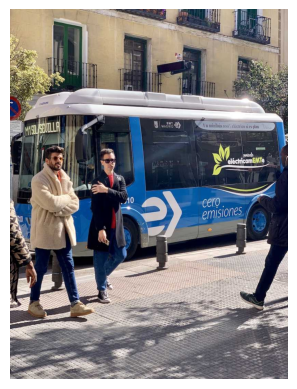

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# demo image 
img_path = "bus.jpg"
img_np = cv2.imread(img_path)
print(f"Shape of the image: {img_np.shape}")
plt.imshow(img_np[:,:,::-1])
plt.axis("off")
plt.show()

In [8]:
# get prediction results 
pred_results = yolo_8(img_path)
print(f"Type of results: {type(pred_results)}")


image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 94.2ms
Speed: 4.5ms preprocess, 94.2ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 480)
Type of results: <class 'list'>


In [12]:
# showing output results of a single image
pred_results[0].show()

In [13]:
# Process results list
# for single or multiple image 
for result in pred_results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

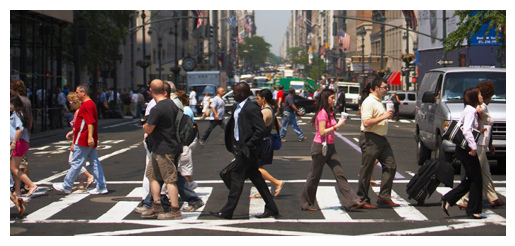

In [24]:
# YOLO can take a range number of source to provide results 
# the following link provided all supported source 
# https://docs.ultralytics.com/modes/predict/#inference-sources
img_source = "crosswalk.png"
cross_walk = cv2.imread(img_source)
plt.imshow(cross_walk[:,:,::-1])
plt.axis('off')
plt.show()

In [25]:
result_2 = yolo_8(img_source)
result_2[0].show()


image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\crosswalk.png: 320x640 12 persons, 3 cars, 1 backpack, 1 handbag, 60.2ms
Speed: 3.0ms preprocess, 60.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


In [26]:
result_2[0].save(filename="cross_walk_output.png")

'cross_walk_output.png'

In [28]:
# we can also apply inference to predict a certain image 
# we can pass many parameters during the inference 
# details: https://docs.ultralytics.com/modes/predict/#inference-sources

# Run inference on 'bus.jpg' and store results
results = yolo_8.predict("bus.jpg", imgsz=320, conf=0.5)

# Process and store results
for result in results:
    boxes = result.boxes  # Bounding boxes
    scores = result.boxes.conf  # Confidence scores
    classes = result.boxes.cls  # Class indices
    keypoints = result.keypoints  # If the model supports keypoints

    # Example: Store as a dictionary
    prediction_data = {
        "boxes": boxes.xyxy.cpu().numpy(),  # Convert to NumPy array
        "scores": scores.cpu().numpy(),
        "classes": classes.cpu().numpy(),
    }

    print(prediction_data)  # Print or save it for later


image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\bus.jpg: 320x256 3 persons, 1 bus, 49.5ms
Speed: 1.5ms preprocess, 49.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 256)
{'boxes': array([[     46.904,      394.45,      232.26,      903.61],
       [      6.437,      227.58,      800.31,      752.67],
       [     220.09,      402.61,      347.93,      854.12],
       [     670.36,      378.11,      809.57,      872.11]], dtype=float32), 'scores': array([    0.84863,     0.82422,     0.75056,     0.63595], dtype=float32), 'classes': array([          0,           5,           0,           0], dtype=float32)}


#### Segmentation

In [29]:
# getting segmentation results

# Load a pretrained YOLO11n-seg Segment model
yolo_11_seg = YOLO("yolo11n-seg.pt")

# Run inference on an image
results = yolo_11_seg ("bus.jpg")  # results list

# View results
for r in results:
    print(r.masks)  # print the Masks object containing the detected instance masks

100%|██████████| 5.90M/5.90M [00:10<00:00, 562kB/s]

image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 24.9ms
Speed: 1.0ms preprocess, 24.9ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0

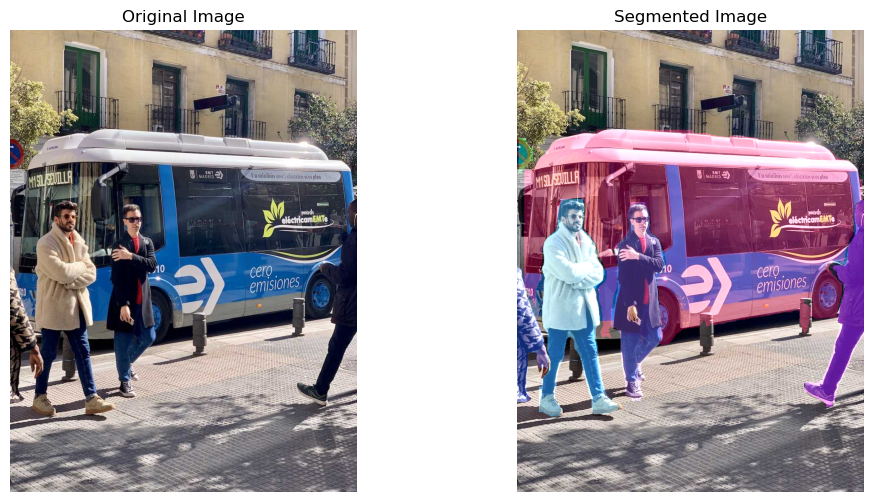

In [32]:
# Load the original image
image = cv2.imread("bus.jpg")  # Read image (BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
original_image = image.copy()  # Store original image for side-by-side display

original_h, original_w, _ = image.shape  # Get original image size

# Process and visualize results
for result in results:
    masks = result.masks  # Extract segmentation masks
    if masks is not None:
        mask_array = masks.data.cpu().numpy()  # Convert to NumPy array (num_instances, H, W)

        # Create an overlay for visualization
        for mask in mask_array:
            mask = (mask > 0.5).astype(np.uint8)  # Convert to binary mask
            mask_resized = cv2.resize(mask, (original_w, original_h))  # Resize mask to original image size

            color = np.random.randint(0, 255, (3,), dtype=int)  # Random color
            colored_mask = np.zeros_like(image, dtype=np.uint8)
            for i in range(3):  # Apply color
                colored_mask[:, :, i] = mask_resized * color[i]
            
            image = cv2.addWeighted(image, 1, colored_mask, 0.5, 0)  # Blend mask with image

# Plot the original and segmented images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1-row, 2-column figure

# Display original image
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display image with segmentation masks
axes[1].imshow(image)
axes[1].set_title("Segmented Image")
axes[1].axis("off")

plt.show()

#### Pose

In [33]:
# Load a pretrained YOLO11n-pose Pose model
yolo_11_pose = YOLO("yolo11n-pose.pt")

# Run inference on an image
results = yolo_11_pose("bus.jpg")  # results list

# View results
for r in results:
    print(r.keypoints)  # print the Keypoints object containing the detected keypoints


100%|██████████| 5.97M/5.97M [00:11<00:00, 559kB/s]



image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\bus.jpg: 640x480 4 persons, 61.0ms
Speed: 4.0ms preprocess, 61.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9909, 0.9289, 0.9869, 0.4269, 0.9314, 0.9907, 0.9976, 0.9247, 0.9884, 0.9013, 0.9744, 0.9969, 0.9984, 0.9949, 0.9975, 0.9786, 0.9856],
        [0.1586, 0.1562, 0.0468, 0.2352, 0.0505, 0.6713, 0.2400, 0.5965, 0.1103, 0.4541, 0.1317, 0.7289, 0.5133, 0.7591, 0.5564, 0.5937, 0.4371],
        [0.9894, 0.9335, 0.9794, 0.5550, 0.9086, 0.9952, 0.9976, 0.9464, 0.9777, 0.9133, 0.9480, 0.9983, 0.9987, 0.9953, 0.9964, 0.9773, 0.9803],
        [0.0986, 0.0392, 0.0630, 0.0391, 0.0677, 0.2100, 0.2335, 0.2613, 0.3050, 0.3421, 0.3552, 0.2777, 0.2914, 0.2390, 0.2478, 0.1391, 0.1386]], device='cuda:0')
data: tensor([[[1.4235e+02, 4.4184e+02, 9.9095e-01],
         [1.4797e+02, 4.3140e+02, 9.2887e-01],
         [1.3053e+02, 4.3335e+02, 9.8691e-01

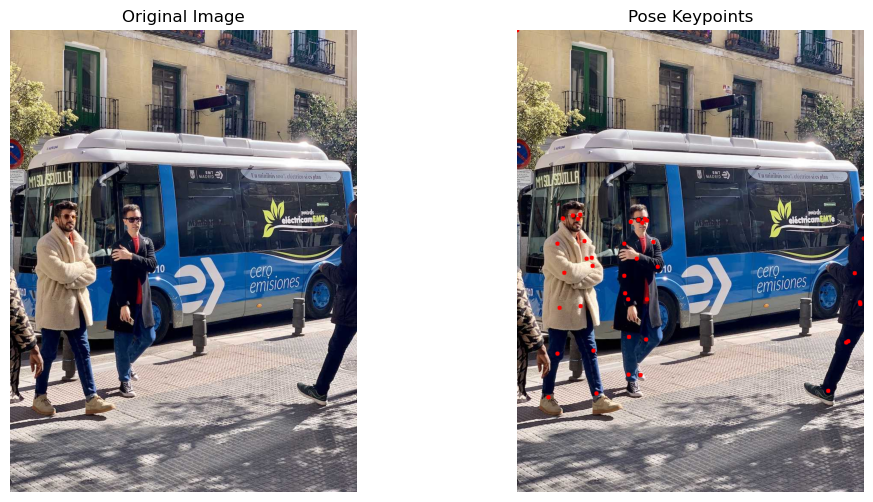

In [34]:
# Load the original image
image = cv2.imread("bus.jpg")  # Read image (BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
original_image = image.copy()  # Keep a copy for side-by-side display

# Process and visualize results
for result in results:
    keypoints = result.keypoints  # Extract keypoints
    if keypoints is not None:
        keypoints_array = keypoints.xy.cpu().numpy()  # Convert to NumPy (num_instances, num_joints, 2)

        for person in keypoints_array:  # Iterate through detected persons
            for x, y in person:  # Iterate through joints
                x, y = int(x), int(y)  # Convert to integers
                cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw keypoints (blue circles)

# Plot the original and pose-detected images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display image with pose keypoints
axes[1].imshow(image)
axes[1].set_title("Pose Keypoints")
axes[1].axis("off")

plt.show()

#### Video

In [35]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load YOLO object detection model
model = YOLO("yolo11n.pt")  # Replace with your model path

# Input and output video paths
input_video_path = "night.mp4"  # Replace with your input video path
output_video_path = "night_output.mp4"  # Output path for detection results

# Open the input video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video writer to save output
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec for MP4 format
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if video ends

    # Convert frame to RGB (YOLO expects RGB format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(frame_rgb)

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes  # Get the bounding boxes
        for box in boxes:  # Loop through detected boxes
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get coordinates (x1, y1, x2, y2)
            conf = box.conf[0].cpu().numpy()  # Confidence score
            cls = box.cls[0].cpu().numpy()  # Class index
            label = result.names[int(cls)]  # Get class label

            # Draw bounding box on the frame
            color = (0, 255, 0)  # Green color for boxes (you can change this)
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

            # Put the label (class name) and confidence score on the frame
            text = f"{label} {conf:.2f}"
            cv2.putText(frame, text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Write the frame with detections to the output video
    out.write(frame)

    # Optional: Display live results (press 'q' to exit)
    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print("Object detection video saved as:", output_video_path)


100%|██████████| 5.35M/5.35M [00:13<00:00, 424kB/s]



0: 384x640 1 car, 43.0ms
Speed: 4.0ms preprocess, 43.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 8.5ms
Speed: 1.0ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 7.2ms
Spe

In [36]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load YOLO object detection model
model = YOLO("yolo11n.pt")  # Replace with your model path

# Input video path
input_video_path = "input_day.mp4"  # Replace with your input video path

# Open the input video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if video ends

    # Convert frame to RGB (YOLO expects RGB format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(frame_rgb)

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes  # Get the bounding boxes
        for box in boxes:  # Loop through detected boxes
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get coordinates (x1, y1, x2, y2)
            conf = box.conf[0].cpu().numpy()  # Confidence score
            cls = box.cls[0].cpu().numpy()  # Class index
            label = result.names[int(cls)]  # Get class label

            # Draw bounding box on the frame
            color = (0, 255, 0)  # Green color for boxes (you can change this)
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

            # Put the label (class name) and confidence score on the frame
            text = f"{label} {conf:.2f}"
            cv2.putText(frame, text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Display the frame with detections
    cv2.imshow("Object Detection - Real-Time", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



0: 384x640 16 cars, 2 buss, 2 trucks, 42.5ms
Speed: 3.5ms preprocess, 42.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 cars, 3 buss, 2 trucks, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load YOLO object detection model
model = YOLO("yolo11n.pt")  # Replace with your model path

# Input video path
input_video_path = "input_day.mp4"  # Replace with your input video path

# Open the input video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the target size for real-time display (smaller size)
display_width = 640  # Set the width for display (you can adjust this)
display_height = 480  # Set the height for display (you can adjust this)

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if video ends

    # Convert frame to RGB (YOLO expects RGB format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(frame_rgb)

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes  # Get the bounding boxes
        for box in boxes:  # Loop through detected boxes
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get coordinates (x1, y1, x2, y2)
            conf = box.conf[0].cpu().numpy()  # Confidence score
            cls = box.cls[0].cpu().numpy()  # Class index
            label = result.names[int(cls)]  # Get class label

            # Draw bounding box on the frame
            color = (0, 255, 0)  # Green color for boxes (you can change this)
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

            # Put the label (class name) and confidence score on the frame
            text = f"{label} {conf:.2f}"
            cv2.putText(frame, text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Resize the frame to the target display size
    resized_frame = cv2.resize(frame, (display_width, display_height))

    # Display the resized frame with detections
    cv2.imshow("Object Detection - Real-Time", resized_frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



0: 384x640 16 cars, 2 buss, 2 trucks, 43.5ms
Speed: 5.1ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 cars, 3 buss, 2 trucks, 7.3ms
Speed: 1.0ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 7.2ms
Speed: 1.0ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 